# Wczytywanie wcześniej przygotowanych danych

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

%matplotlib inline

In [2]:
X_train = pd.read_csv("../output/X_train.csv", index_col = "index")
y_train = pd.read_csv("../output/y_train.csv", names = ["index", "klasa"], index_col = "index")

X_test = pd.read_csv("../output/X_test.csv", index_col = "index")
y_test = pd.read_csv("../output/y_test.csv", names = ["index", "klasa"], index_col = "index")

In [3]:
%%bash
head ../output/y_train.csv
head ../output/X_train.csv

922577,Ł
908194,Z
871642,Ł
8812818,Ł
89143601,Ł
86973701,Ł
9113156,Ł
875099,Ł
864726,Ł
915940,Ł
index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,0.2104,0.9670000000000001,1.3559999999999999,12.97,0.007086,0.007247,0.01012,0.005495,0.0156,0.002606,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.023809999999999998,0.2681,0.07399
908194,20.18,19.54,133.8,1250.0,0.1133,0.1489,0.2133,0.1259,0.1724,0.060529999999999994,0.4331,1.001,3.008,52.49,0.009087,0.02715,0.05546,0.0191,0.02

In [4]:
assert (X_train.index == y_train.index).all() == True
assert (X_test.index == y_test.index).all() == True

# Uruchomienie prostego lasu losowego

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = False, max_features = None)

In [7]:
las.fit(X = X_train, y = y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [8]:
las.score(X = X_test, y = y_test)

0.868421052631579

# Las na bazie poprzednio wyliczonych hiperparametrów

In [9]:
hiperparametry = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [10]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = False, max_features = None, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [11]:
las.fit(X = X_train, y = y_train.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=4, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [12]:
las.score(X = X_test, y = y_test)

0.9298245614035088

# bootstrap = True

In [13]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = None, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [14]:
las.fit(X = X_train, y = y_train.values.ravel())
las.score(X = X_test, y = y_test)

0.9473684210526315

# max_features = sqrt(n_features)

In [15]:
max_features = int(np.sqrt(len(X_train.columns)))

In [16]:
max_features

5

In [17]:
las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])

In [18]:
las.fit(X = X_train, y = y_train.values.ravel())
las.score(X = X_test, y = y_test)

0.9649122807017544

# Test stabilności

In [19]:
nazwy_kolumn = ["klasa", "mean radius", "mean texture", "mean perimeter", "mean area","mean smoothness", 
                "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension", 
                "radius error", "texture error", "perimeter error", "area error", "smoothness error", 
                "compactness error", "concavity error", "concave points error", "symmetry error", 
                "fractal dimension error", "worst radius", "worst texture", "worst perimeter", "worst area", 
                "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", 
                "worst fractal dimension"]

nowotwor = pd.read_csv("../input/wdbc.data", names = nazwy_kolumn)

nowotwor["klasa"] = nowotwor["klasa"].str.replace("B", "Ł")
nowotwor["klasa"] = nowotwor["klasa"].str.replace("M", "Z")

X = nowotwor.drop(["klasa"], axis = 1)
y = nowotwor["klasa"]

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [20]:
%%time
rezultaty = pd.DataFrame()
for ziarno_losowośći in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=ziarno_losowośći, stratify = y)
    las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"])
    las.fit(X = X_train, y = y_train)
    głupi = DummyClassifier(strategy="stratified", random_state=42)
    głupi.fit(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"dokładność_las": las.score(X = X_test, y = y_test), 
                                  "dokładność_głupi": głupi.score(X = X_test, y = y_test)}, ignore_index = True)

CPU times: user 5.43 s, sys: 18.9 ms, total: 5.45 s
Wall time: 5.98 s


In [21]:
rezultaty

,dokładność_głupi,dokładność_las
0,0.508772,0.929825
1,0.596491,0.929825
2,0.578947,0.973684
3,0.543860,0.964912
4,0.596491,0.964912
5,0.543860,0.964912
6,0.508772,0.964912
7,0.526316,0.938596
8,0.526316,0.982456
9,0.543860,0.956140


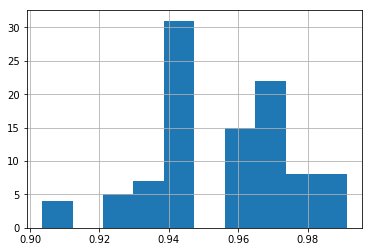

In [22]:
rezultaty["dokładność_las"].hist()

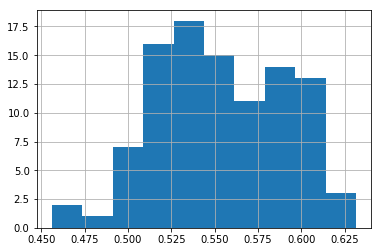

In [23]:
rezultaty["dokładność_głupi"].hist()

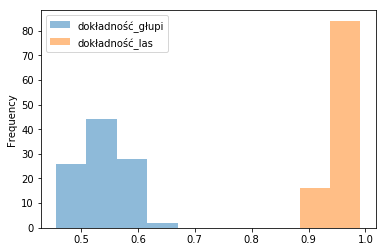

In [24]:
rezultaty.plot.hist(alpha=0.5)

In [25]:
pandas_profiling.ProfileReport(rezultaty)

Number of variables,2
Number of observations,100
Total Missing (%),0.0%
Total size in memory,1.6 KiB
Average record size in memory,16.8 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# n_estimators = 100

In [26]:
%%time
rezultaty = pd.DataFrame()
for ziarno_losowośći in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=ziarno_losowośći, stratify = y)
    las = RandomForestClassifier(criterion = "entropy", random_state = 42, bootstrap = True, max_features = max_features, 
                             max_depth = hiperparametry["max_depth"], 
                             min_samples_leaf = hiperparametry["min_samples_leaf"], 
                             min_samples_split = hiperparametry["min_samples_split"], n_estimators = 100)
    las.fit(X = X_train, y = y_train)
    głupi = DummyClassifier(strategy="stratified", random_state=42)
    głupi.fit(X = X_train, y = y_train)
    rezultaty = rezultaty.append({"dokładność_las": las.score(X = X_test, y = y_test), 
                                  "dokładność_głupi": głupi.score(X = X_test, y = y_test)}, ignore_index = True)

CPU times: user 43.5 s, sys: 121 ms, total: 43.6 s
Wall time: 44.9 s


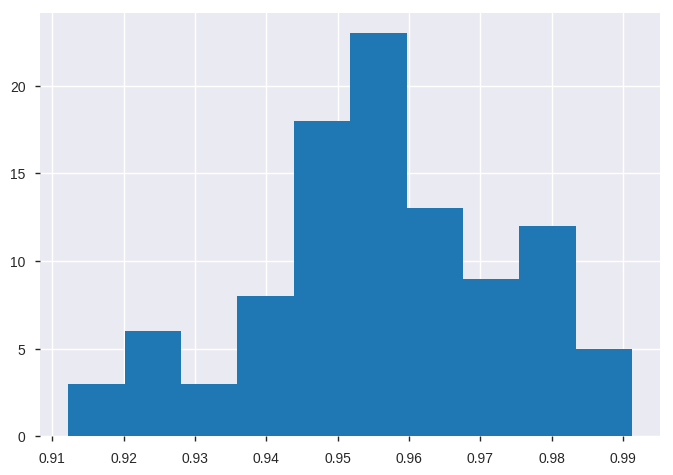

In [27]:
rezultaty["dokładność_las"].hist()

In [28]:
pandas_profiling.ProfileReport(rezultaty)

Number of variables,2
Number of observations,100
Total Missing (%),0.0%
Total size in memory,1.6 KiB
Average record size in memory,16.8 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Feature importances

In [61]:
las.feature_importances_

array([0.05901004, 0.01112241, 0.06789402, 0.04190245, 0.00303736,
       0.00846361, 0.05970381, 0.08995212, 0.0029306 , 0.00281579,
       0.01156891, 0.0017086 , 0.01126133, 0.03777493, 0.00173118,
       0.00465333, 0.00598432, 0.00165682, 0.003117  , 0.0019966 ,
       0.0621793 , 0.0174366 , 0.09326033, 0.19684338, 0.01349375,
       0.01118907, 0.0361077 , 0.12798112, 0.00717237, 0.00605114])

In [62]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

# OOB score

# Wizualizacja lasu

In [39]:
from sklearn import tree
import graphviz

In [49]:
for numerek in range(0,11):
    drzewo = las.estimators_[numerek]
    dot_data = tree.export_graphviz(drzewo, out_file = None,
                         feature_names = X.columns, class_names = ["Z", "Ł"],
                         filled = True, rounded = True,  
                         special_characters = True)  
    graph = graphviz.Source(dot_data)  
    graph.render("../output/drzewo-{}".format(numerek))

In [60]:
%%bash
evince ../output/drzewo-9.pdf